In [1]:
!pip install yfinance prophet --upgrade


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [3]:
# Download 10 years of AAPL stock data
df = yf.download('AAPL', start='2014-01-01', end='2024-12-31')
df.reset_index(inplace=True)  # Reset index to access 'Date' column
df.head()


/tmp/ipython-input-3-2302704946.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2014-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-01-02,17.192822,17.314045,17.158320,17.272083,234684800
1,2014-01-03,16.815168,17.210541,16.798072,17.184432,392467600
2,2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
3,2014-01-07,16.785952,16.969961,16.720056,16.918986,317209200
4,2014-01-08,16.892250,16.957523,16.743986,16.747714,258529600


In [16]:
df.to_csv('AAPL_2014_2024.csv')


In [17]:
df = pd.read_csv('AAPL_2014_2024.csv', header=[0, 1])  # Reads both rows as a MultiIndex



In [18]:
# Flatten multi-level columns
df.columns = df.columns.map(lambda x: x[0] if x[1] == 'AAPL' else x[1])
df.head()


,Ticker,Close_AAPL,High,Low,Open,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,17.192822,17.314045,17.158320,17.272083,234684800.0
2,2014-01-03,16.815168,17.210541,16.798072,17.184432,392467600.0
3,2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800.0
4,2014-01-07,16.785952,16.969961,16.720056,16.918986,317209200.0


In [19]:
print(df.columns)


Index(['Ticker', 'Close_AAPL', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [20]:
df = df.drop(index=0).reset_index(drop=True)


In [21]:
df = df.rename(columns={'Ticker': 'Date'})



In [22]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Close_AAPL'] = pd.to_numeric(df['Close_AAPL'], errors='coerce')  # Ensure float


In [23]:
df_clean = df[['Date', 'Close_AAPL']].rename(columns={'Date': 'ds', 'Close_AAPL': 'y'})


In [24]:
# Step 4: Prepare for Prophet
df_prophet = df[['Date', 'Close_AAPL']].rename(columns={'Date': 'ds', 'Close_AAPL': 'y'})
df_prophet.dropna(inplace=True)

In [25]:
# Step 5: Forecast with Prophet
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpse3uwk/jr92wdnj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpse3uwk/v9a6dsvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88062', 'data', 'file=/tmp/tmprpse3uwk/jr92wdnj.json', 'init=/tmp/tmprpse3uwk/v9a6dsvz.json', 'output', 'file=/tmp/tmprpse3uwk/prophet_model9tk9yulc/prophet_model-20250623164222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


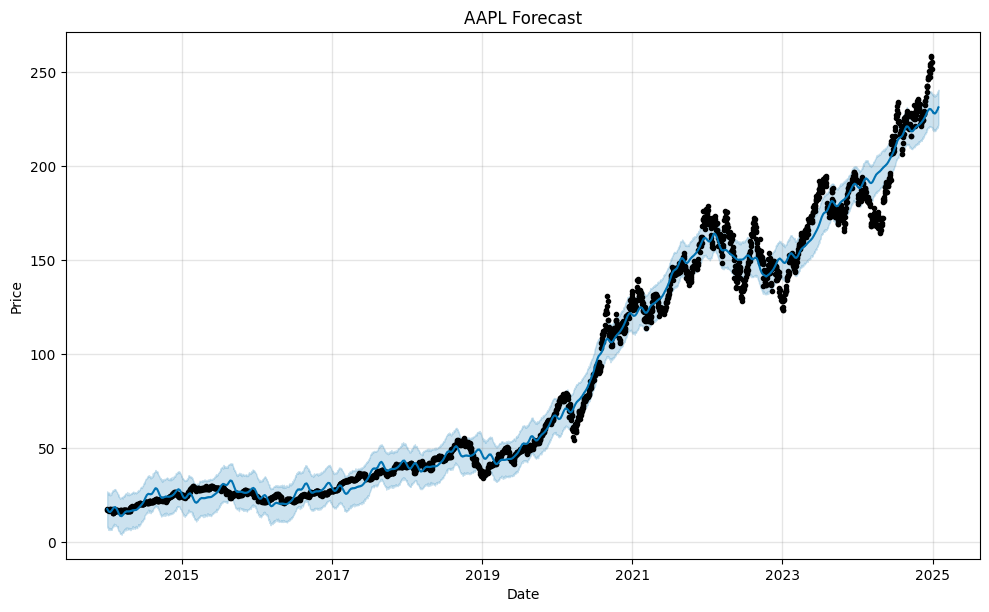

In [26]:
# Step 6: Plot
import matplotlib.pyplot as plt
model.plot(forecast)
plt.title("AAPL Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

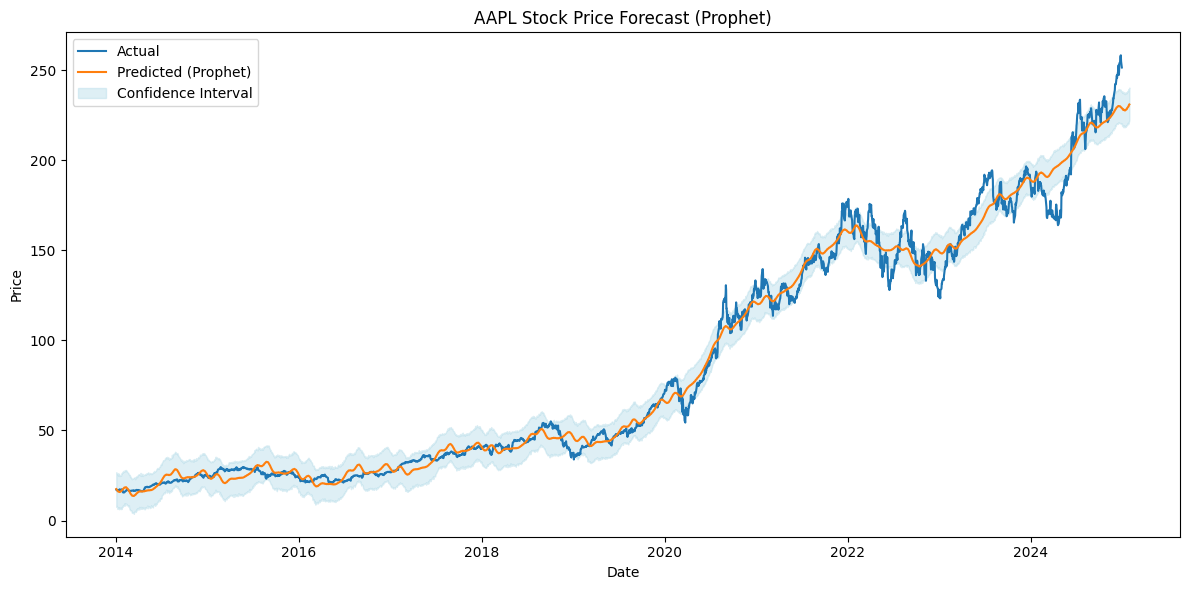

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')

plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (Prophet)')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='lightblue', alpha=0.4, label='Confidence Interval')

plt.title('AAPL Stock Price Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
